In [1]:
import earthkit

In [2]:
data = earthkit.data.from_source(
    'cds', 'satellite-ozone-v1',
    {
        'processing_level': 'level_4',
        'variable': 'atmosphere_mole_content_of_ozone',
        'vertical_aggregation': 'total_column',
        'sensor': 'msr',
        'year': '1993',
        'month': '10',
        'version': 'v0023',
    },
)[0]

In [3]:
style = earthkit.maps.styles.Style(colors="turbo", levels=range(120, 420, 20))

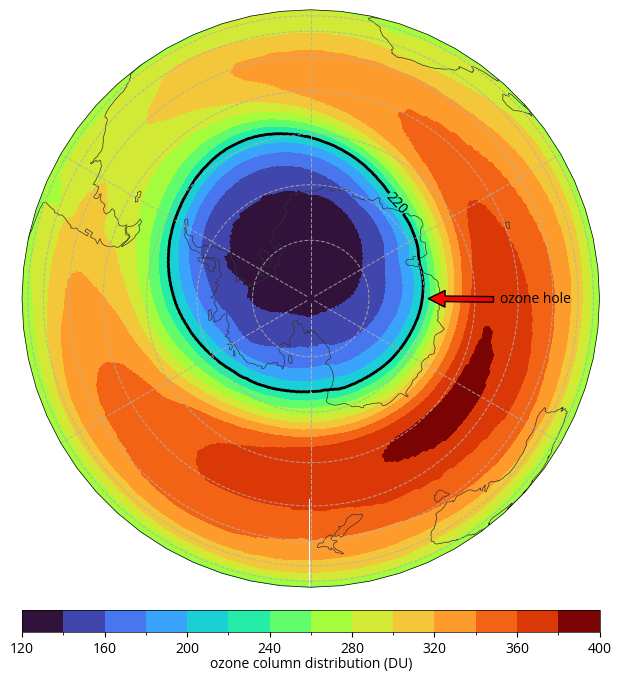

In [4]:
import cartopy.crs as ccrs

chart = earthkit.maps.Chart(crs=ccrs.NearsidePerspective(central_latitude=-90))
chart.shaded_contour(data, style=style)

chart.contour(
    data, levels=[220], linewidths=2,
    labels=True, label_fontsize=10,
)

chart.coastlines()
chart.gridlines(draw_labels=False)

chart.subplots[0].ax.annotate(
    'ozone hole',
    xy=(90, -70),
    xytext=(0.5, 0.5),
    textcoords='figure fraction',
    arrowprops=dict(facecolor='red', shrink=0.05),
    verticalalignment='bottom',
    transform=ccrs.Geodetic(),
)

chart.legend(location="bottom", title="ozone column distribution (DU)")

chart.show()